In [250]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [251]:
df = pd.read_csv("data.csv")
df.index = df.index + 1
df

,Year,X1,X2,X3
1,1980,2.81,7.54,7.89
2,1981,2.81,11.10,4.81
3,1982,2.56,3.80,4.64
4,1983,2.88,2.37,2.26
5,1984,2.70,3.49,1.90
6,1985,2.64,3.31,1.58
7,1986,2.31,4.85,3.30
8,1987,2.13,5.41,1.49
9,1988,2.29,5.32,14.79
10,1989,2.13,39.87,1.92


In [254]:
#df.drop(df.columns[[0]], axis=1, inplace=True)
df.describe()

,X1,X2,X3
count,31.000000,31.000000,31.000000
mean,3.318387,18.282581,5.511290
std,0.990384,10.017507,3.515219
min,2.070000,2.370000,1.490000
25%,2.565000,9.320000,3.080000
50%,2.880000,19.850000,4.660000
75%,4.485000,24.505000,6.915000
max,4.770000,39.870000,16.510000


In [258]:
stats.gmean(df.iloc[:,0:3],axis=0)

array([  3.18101042,  14.5194405 ,   4.60051488])

In [294]:
print(df.var())
#df.plot.scatter(x='X2', y='X1', c='X3', colormap='viridis')

X1      0.980861
X2    100.350453
X3     12.356765
dtype: float64


In [267]:
df.median()

X1     2.88
X2    19.85
X3     4.66
dtype: float64

In [295]:
df.std()

X1     0.990384
X2    10.017507
X3     3.515219
dtype: float64

In [268]:
df.mode()

,X1,X2,X3
0,2.13,2.37,4.66
1,2.44,3.31,NaN
2,2.81,3.49,NaN
3,2.88,3.80,NaN
4,4.69,4.85,NaN
5,4.77,5.32,NaN
6,NaN,5.41,NaN
7,NaN,7.54,NaN
8,NaN,11.10,NaN
9,NaN,16.12,NaN


In [273]:
df.kurtosis()

X1   -1.589347
X2   -0.467017
X3    3.078477
dtype: float64

X1    0.417005
X2   -0.001244
X3    1.576127
dtype: float64


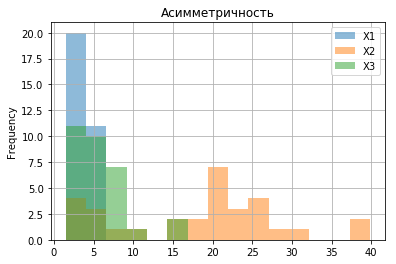

In [285]:
skew = df.skew()
print(skew)
df.plot.hist(alpha=0.5, bins=15, grid=True)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.title("Асимметричность")
plt.show()

In [248]:
for i in range(1, 28):
    print('Лаг - ', i, 'Значение - ', df['X1'].autocorr(lag=i))

Лаг -  1 Значение -  0.953361686336
Лаг -  2 Значение -  0.870480234462
Лаг -  3 Значение -  0.754870416439
Лаг -  4 Значение -  0.652681155699
Лаг -  5 Значение -  0.575740984059
Лаг -  6 Значение -  0.533121943365
Лаг -  7 Значение -  0.522902150197
Лаг -  8 Значение -  0.500231366771
Лаг -  9 Значение -  0.455832159575
Лаг -  10 Значение -  0.363589154661
Лаг -  11 Значение -  0.143585918663
Лаг -  12 Значение -  -0.179639373669
Лаг -  13 Значение -  -0.377486978327
Лаг -  14 Значение -  -0.403607057885
Лаг -  15 Значение -  -0.374803664205
Лаг -  16 Значение -  -0.308139955597
Лаг -  17 Значение -  -0.287811685952
Лаг -  18 Значение -  -0.281380436685
Лаг -  19 Значение -  -0.337774170526
Лаг -  20 Значение -  -0.118621655677
Лаг -  21 Значение -  0.150315452373
Лаг -  22 Значение -  -0.0638064726717
Лаг -  23 Значение -  -0.228027450912
Лаг -  24 Значение -  0.00813333280137
Лаг -  25 Значение -  0.446638181183
Лаг -  26 Значение -  -0.298559728483
Лаг -  27 Значение -  -0.6102388

In [208]:
X = [i for i in range(1, 32)]
Y = df['X1']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     58.48
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           1.97e-08
Time:                        12:01:06   Log-Likelihood:                -26.066
No. Observations:                  31   AIC:                             56.13
Df Residuals:                      29   BIC:                             59.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8934      0.213      8.869      0.0

In [245]:
trends = pd.DataFrame({'X1': df['X1'], 
                       'X1T': [i * 0.0891 + 1.8934 for i, row in df.iterrows()]
                      })

trends['X1 случ состав'] = [row['X1'] - trends['X1T'][i] for i, row in df.iterrows()]

print(trends)
#trends.head(32)

      X1     X1T  X1 случ состав
1   2.81  1.9825          0.8275
2   2.81  2.0716          0.7384
3   2.56  2.1607          0.3993
4   2.88  2.2498          0.6302
5   2.70  2.3389          0.3611
6   2.64  2.4280          0.2120
7   2.31  2.5171         -0.2071
8   2.13  2.6062         -0.4762
9   2.29  2.6953         -0.4053
10  2.13  2.7844         -0.6544
11  2.44  2.8735         -0.4335
12  2.58  2.9626         -0.3826
13  2.95  3.0517         -0.1017
14  3.08  3.1408         -0.0608
15  2.78  3.2299         -0.4499
16  2.57  3.3190         -0.7490
17  2.07  3.4081         -1.3381
18  2.44  3.4972         -1.0572
19  2.88  3.5863         -0.7063
20  3.64  3.6754         -0.0354
21  4.06  3.7645          0.2955
22  4.77  3.8536          0.9164
23  4.77  3.9427          0.8273
24  4.67  4.0318          0.6382
25  4.50  4.1209          0.3791
26  4.58  4.2100          0.3700
27  4.46  4.2991          0.1609
28  4.47  4.3882          0.0818
29  4.69  4.4773          0.2127
30  4.69  

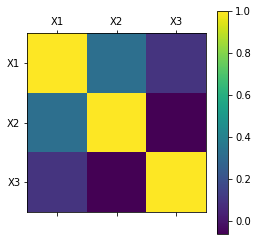

In [195]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [196]:
corr = df.corr()
corr.style.background_gradient()

,X1,X2,X3
X1,1,0.325453,0.0968826
X2,0.325453,1,-0.0636568
X3,0.0968826,-0.0636568,1


In [197]:
first = 1 + 0.325453 + 0.0968826
second = 0.325453 + 1 - 0.0636568
third = 0.0968826 - 0.0636568 + 1
print('Показатель 1 = ', first, 'Показатель 2 = ', second, 'Показатель 3 = ', third)

Показатель 1 =  1.4223356 Показатель 2 =  1.2617962 Показатель 3 =  1.0332258


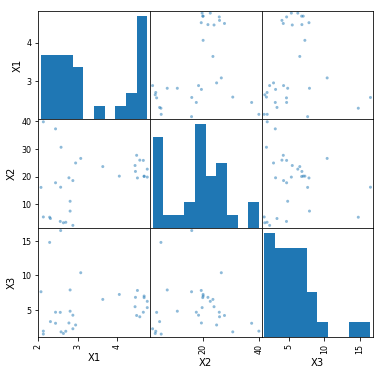

In [198]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [199]:
X = df[['X2','X3']]
Y = df['X1']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
print('\n ---- Predictions ----\n')
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.906
Date:                Mon, 14 Jan 2019   Prob (F-statistic):              0.168
Time:                        18:27:34   Log-Likelihood:                -41.201
No. Observations:                  31   AIC:                             88.40
Df Residuals:                      28   BIC:                             92.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5332      0.469      5.397      0.0

In [207]:
#for i, row in df.iterrows():
for i in range(1, 37):
    predict = 0.0333 * i + 2.5332
    print('t - ', i, 'Значение - ', predict)

t -  1 Значение -  2.5665
t -  2 Значение -  2.5998
t -  3 Значение -  2.6330999999999998
t -  4 Значение -  2.6664
t -  5 Значение -  2.6997
t -  6 Значение -  2.733
t -  7 Значение -  2.7662999999999998
t -  8 Значение -  2.7996
t -  9 Значение -  2.8329
t -  10 Значение -  2.8662
t -  11 Значение -  2.8994999999999997
t -  12 Значение -  2.9328
t -  13 Значение -  2.9661
t -  14 Значение -  2.9994
t -  15 Значение -  3.0327
t -  16 Значение -  3.066
t -  17 Значение -  3.0993
t -  18 Значение -  3.1326
t -  19 Значение -  3.1658999999999997
t -  20 Значение -  3.1992
t -  21 Значение -  3.2325
t -  22 Значение -  3.2658
t -  23 Значение -  3.2991
t -  24 Значение -  3.3324
t -  25 Значение -  3.3657
t -  26 Значение -  3.399
t -  27 Значение -  3.4323
t -  28 Значение -  3.4656000000000002
t -  29 Значение -  3.4989
t -  30 Значение -  3.5322
t -  31 Значение -  3.5655
t -  32 Значение -  3.5987999999999998
t -  33 Значение -  3.6321000000000003
t -  34 Значение -  3.6654
t -  35 Зн